<a href="https://colab.research.google.com/github/M-PRERNA/transformers-cheatsheet/blob/main/Video_Transcript_Summarization_Hugging_Face_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q transformers

     |████████████████████████████████| 2.9 MB 7.9 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 636 kB 60.7 MB/s 
     |████████████████████████████████| 895 kB 91.9 MB/s 
     |████████████████████████████████| 3.3 MB 47.4 MB/s 


In [3]:
! pip install -q youtube_transcript_api

In [4]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [5]:
youtube_video = "https://www.youtube.com/watch?v=ddx8t6zGWxA"
video_id = youtube_video.split('=')[1]

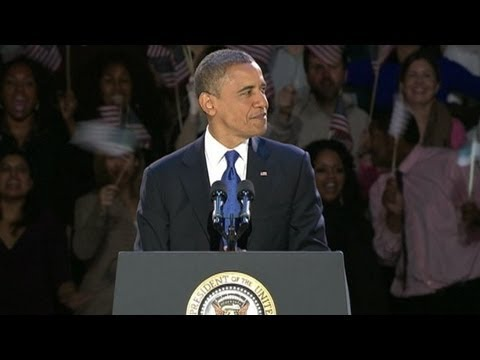

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [11]:
transcript[0:3]

[{'duration': 2.03, 'start': 0.0, 'text': 'ah'},
 {'duration': 2.899, 'start': 28.38, 'text': 'thank you'},
 {'duration': 9.28,
  'start': 39.12,
  'text': 'tonight more than 200 years after a'}]

In [12]:
result = "" #converting the transcripts into paragraphs
for i in transcript:
  result += ' '+ i['text']

In [14]:
print(len(result))

11323


In [15]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [18]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range (0, num_iters+1):
  start = 0
  start = i * 1000
  end = (i+1)*1000
  out = summarizer(result[start:end], max_length = 65)
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

In [21]:
print(len(summarized_text))

12


In [23]:
str(summarized_text)

'[\' Thank you tonight more than 200 years after a former colony won the right to determine its own destiny . The task of perfecting our union moves forward it moves forward because of you . The best is yet to come for the United States of America, the best is still to come, says President Obama .\', \' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Obama thanks his friend and partner of the last four years Michelle Obama for her support . Joe Biden says he has never been prouder to watch the rest of America fall in love with Michelle Obama .\', " Sasha and malia are growing up to become too strong smart beautiful young women just like your mom and I\'m so proud of you guys . I will always be grateful for everything that you\'ve done all the incredible work that you put in I know that political campaigns can sometimes seem small even silly .", " If you ever get the chance to talk to folks who turned out our rallies and crowded along a rope line in a